# Spotify preprocessing in python using spotipy

## By Nils Jennissen and Ruben Tak

Github:
- https://github.com/nilsjenn
- https://github.com/rubentak

Medium:
- https://medium.com/@nijenn
- https://medium.com/@rubentak

In [1]:
#importing libraries
import credentials
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Credentials:
The user credentials are stored in a seperate file. Storing credentials in a separate file in a Python project provides security, separation of concerns, flexibility, collaboration, and better version control management. The scope defines the access to the user data. The token is created with the user credentials and the scope. The token is used to access the user data.

The credentials are stored in the following way:

USER = '...'
CID = '...'
SECRET = '...'
REDIRECT = '...'

Fill in your own credentials in the credentials file

In [2]:
# Retrieve user credentials from separate file
user = credentials.USER
cid = credentials.CID
secret = credentials.SECRET
redirect_uri = credentials.REDIRECT

# Define scope of access
scope = 'user-library-read'  # user-library-read, user-read-recently-played

# Prompt for user token using credentials
token = spotipy.util.prompt_for_user_token(user, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

# Create Spotify token and check if successful
if token:
    sp = spotipy.Spotify(auth=token)
    print('Token created for', user)
else:
    print("Can't get token for", user)

Token created for 4bvzegnwgx9waifbbfrdpa75s


#### Look if the right user is logged in

In [3]:
# User data
user_data = sp.current_user()
print('My data:')
print('Name:', user_data['display_name'])
print('Followers:', user_data['followers']['total'])
print('Link:', user_data['external_urls']['spotify'])

My data:
Name: Ruben
Followers: 11
Link: https://open.spotify.com/user/4bvzegnwgx9waifbbfrdpa75s


# Deriving saved songs from spotify library

In the following code, the saved songs are retrieved from the spotify library. The songs are stored in a dataframe.

In [4]:
# Function to get all saved tracks
def get_saved_tracks():
    results = sp.current_user_saved_tracks()
    tracks = []
    while results['next']:
        tracks.extend(results['items'])
        results = sp.next(results)
    return tracks

# Converting tracks to dataframe
def deconstruct_tracks(tracks):
    saved_tracks = []
    for track in tracks:
        saved_track = {
            'added_at': track['added_at'],
            'id': track['track']['id'],
            'name': track['track']['name'],
            'popularity': track['track']['popularity'],
            'uri': track['track']['uri'],
            'artist': track['track']['artists'][0]['name'],
            'album': track['track']['album']['name'],
            'release_date': track['track']['album']['release_date'],
            'duration_ms': track['track']['duration_ms']
        }
        saved_tracks.append(saved_track)
    return pd.DataFrame(saved_tracks)

tracks_called = get_saved_tracks()
tracklist = deconstruct_tracks(tracks_called)

In [5]:
tracklist.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,CLTX,Ethereal VA,2022-02-21,355892
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348


# Loading all audio features of the saved tracks

#### In the next part of the code, the audio features of the saved tracks are retrieved. The audio features are stored in a dataframe. The dataframe is saved as a csv file.



The following discription of the Audio Features is given:

**Acousticness**: A value from 0.0 to 1.0 indicating whether a track is acoustic, with 1.0 representing high confidence in acoustic nature.

**Danceability**: A measure from 0.0 to 1.0 describing how suitable a track is for dancing based on elements like tempo, rhythm stability, beat strength, and regularity, with 0.0 being least danceable and 1.0 being most danceable.

**Energy**: A value from 0.0 to 1.0 representing the intensity and activity of a track, with energetic tracks feeling fast, loud, and noisy. Perceptual features like dynamic range, perceived loudness, timbre, onset rate, and entropy contribute to this attribute.

**Instrumentalness**: A prediction of whether a track contains vocals, with values closer to 1.0 indicating a higher likelihood of no vocal content. Values above 0.5 typically represent instrumental tracks, with higher confidence as the value approaches 1.0.

**Liveness**: A value indicating the presence of an audience in a recording, with higher values representing higher likelihood of a live performance. A value above 0.8 suggests strong likelihood of a live track.

**Loudness**: The overall loudness of a track in decibels (dB), averaged across the entire track and useful for comparing relative loudness of tracks. Values typically range between -60 and 0 dB.

**Speechiness**: A measure indicating the presence of spoken words in a track, with values closer to 1.0 suggesting more speech-like recordings. Values above 0.66 describe tracks made entirely of spoken words, while values between 0.33 and 0.66 may indicate a mix of music and speech, including rap music. Values below 0.33 mostly represent music and non-speech-like tracks.

**Tempo**: The overall estimated tempo of a track in beats per minute (BPM), indicating the speed or pace of the music.

**Time signature**: A musical term specifying the number of beats in each bar or measure.

**Valence**: A value from 0.0 to 1.0 describing the musical positiveness conveyed by a track, with high valence indicating more positive emotions like happiness and low valence indicating more negative emotions like sadness.

**Mode**: An indicator of the modality (major or minor) of a track, with 1 representing major and 0 representing minor.

**Key**: The estimated overall key of a track, mapped to integers using standard Pitch Class notation (e.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on).

In [6]:
# Function to get all audio features of the saved tracks
def get_track_features(id):
    metadata = sp.track(id)
    features = sp.audio_features(id)

    # metadata
    id = metadata['id']
    name = metadata['name']
    album = metadata['album']['name']
    artist = metadata['album']['artists'][0]['name']
    release_date = metadata['album']['release_date']
    length = metadata['duration_ms']
    popularity = metadata['popularity']

    # audio features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']
    mode = features[0]['mode']
    key = features[0]['key']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy,
             instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence, mode, key]
    return track

print("Function defined")

Function defined


In [7]:
# Loop through each track id and get the tracks features
for i in range(len(tracklist)):
    try:
        track = get_track_features(tracklist['id'][i])
        tracklist.loc[i, 'name'] = track[0]
        tracklist.loc[i, 'album'] = track[1]
        tracklist.loc[i, 'artist'] = track[2]
        tracklist.loc[i, 'release_date'] = track[3]
        tracklist.loc[i, 'length'] = track[4]
        tracklist.loc[i, 'popularity'] = track[5]
        tracklist.loc[i, 'danceability'] = track[6]
        tracklist.loc[i, 'acousticness'] = track[7]
        tracklist.loc[i, 'danceability'] = track[8]
        tracklist.loc[i, 'energy'] = track[9]
        tracklist.loc[i, 'instrumentalness'] = track[10]
        tracklist.loc[i, 'liveness'] = track[11]
        tracklist.loc[i, 'loudness'] = track[12]
        tracklist.loc[i, 'speechiness'] = track[13]
        tracklist.loc[i, 'tempo'] = track[14]
        tracklist.loc[i, 'time_signature'] = track[15]
        tracklist.loc[i, 'valence'] = track[16]
        tracklist.loc[i, 'mode'] = track[17]
        tracklist.loc[i, 'key'] = track[18]

        # Save to df
        tracklist.to_csv('tracklist.csv', index=False, encoding='utf-8')
    except:
        print(f"Error with track {i}")
        pass

print(f"Features of {len(tracklist)} tracks extracted and saved to tracklist.csv")

Error with track 256
Error with track 735
Features of 1380 tracks extracted and saved to tracklist.csv


In [8]:
tracklist.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.998,0.298,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.688,0.708,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.564,0.164,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.571,0.538,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.861,0.873,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000,434000.0,...,0.960,0.898,0.0765,-5.807,0.0385,148.006,4.0,0.9650,0.0,10.0
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,Various Artists,Ethereal VA,2022-02-21,355892,355892.0,...,0.996,0.753,0.2200,-7.465,0.0478,149.976,4.0,0.3640,1.0,7.0
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998,404998.0,...,0.897,0.901,0.0986,-8.289,0.0492,127.972,4.0,0.5160,0.0,3.0
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666,594666.0,...,0.657,0.897,0.0926,-9.726,0.0649,132.992,4.0,0.2210,1.0,2.0
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348,250348.0,...,0.935,0.868,0.0511,-4.213,0.0712,155.007,4.0,0.9030,1.0,11.0


In [9]:
# Read and check of the loaded data
data = pd.read_csv('tracklist.csv')
data.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.998,0.298,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.688,0.708,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.564,0.164,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.571,0.538,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.861,0.873,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000,434000.0,...,0.960,0.898,0.0765,-5.807,0.0385,148.006,4.0,0.9650,0.0,10.0
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,Various Artists,Ethereal VA,2022-02-21,355892,355892.0,...,0.996,0.753,0.2200,-7.465,0.0478,149.976,4.0,0.3640,1.0,7.0
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998,404998.0,...,0.897,0.901,0.0986,-8.289,0.0492,127.972,4.0,0.5160,0.0,3.0
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666,594666.0,...,0.657,0.897,0.0926,-9.726,0.0649,132.992,4.0,0.2210,1.0,2.0
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348,250348.0,...,0.935,0.868,0.0511,-4.213,0.0712,155.007,4.0,0.9030,1.0,11.0


#### Add all genres of the artists to the dataframe

The genres are not included in the Spotify API, so we need to get them from the Spotify API. We can do this by searching for the artist and getting the artist id. Then we can use the artist id to get the genres of the artist.

In [10]:
# Add all genres of the artists to the dataframe
genres = []
for i in range(len(data)):
    artist = data['artist'][i]
    artist_id = sp.search(artist, type='artist')['artists']['items'][0]['id']
    artist_genres = sp.artist(artist_id)['genres']
    genres.append(artist_genres)

data['genres'] = genres
data.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,genres
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.298,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0,[]
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.708,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0,"[afro house, deep house, south african house, ..."
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.164,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0,[]
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.538,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0,[electronica]
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.873,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0,"[indie soul, uk contemporary r&b]"
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000,434000.0,...,0.898,0.0765,-5.807,0.0385,148.006,4.0,0.9650,0.0,10.0,[]
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,Various Artists,Ethereal VA,2022-02-21,355892,355892.0,...,0.753,0.2200,-7.465,0.0478,149.976,4.0,0.3640,1.0,7.0,"[disco, funk, post-disco, quiet storm, soul]"
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998,404998.0,...,0.901,0.0986,-8.289,0.0492,127.972,4.0,0.5160,0.0,3.0,[]
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666,594666.0,...,0.897,0.0926,-9.726,0.0649,132.992,4.0,0.2210,1.0,2.0,[bubble trance]
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348,250348.0,...,0.868,0.0511,-4.213,0.0712,155.007,4.0,0.9030,1.0,11.0,[]


In [12]:
# Transform the genre column to extract specific genres
data['genres'] = data['genres'].astype(str)
data['genres'] = data['genres'].str.replace('[', '')
data['genres'] = data['genres'].str.replace(']', '')
data['genres'] = data['genres'].str.replace("'", '')
data['genres'] = data['genres'].str.replace('"', '')
data.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,genres
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.298,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0,
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.708,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0,"afro house, deep house, south african house, s..."
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.164,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0,
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.538,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0,electronica
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.873,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0,"indie soul, uk contemporary r&b"
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000,434000.0,...,0.898,0.0765,-5.807,0.0385,148.006,4.0,0.9650,0.0,10.0,
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,Various Artists,Ethereal VA,2022-02-21,355892,355892.0,...,0.753,0.2200,-7.465,0.0478,149.976,4.0,0.3640,1.0,7.0,"disco, funk, post-disco, quiet storm, soul"
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998,404998.0,...,0.901,0.0986,-8.289,0.0492,127.972,4.0,0.5160,0.0,3.0,
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666,594666.0,...,0.897,0.0926,-9.726,0.0649,132.992,4.0,0.2210,1.0,2.0,bubble trance
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348,250348.0,...,0.868,0.0511,-4.213,0.0712,155.007,4.0,0.9030,1.0,11.0,


#### The genres are very specific and detailed. By grouping the genres we can get a more general overview of the genres. This will cost us some information, but it will be easier to get a general overview.

In [13]:
# Search for predefined genres in the genre column
strings = ['pop', 'techno', 'house', 'disco', 'electronic',
           'trance', 'hip hop', 'rap', 'r&b', 'soul', 'rock',
           'metal', 'punk', 'jazz', 'blues', 'country', 'folk',
           'reggae', 'classical', 'indie', 'funk']

for string in strings:
    data.loc[data['genres'].str.contains(string), 'genre_group'] = string

data.head(10)

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,genres,genre_group
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0,,NaN
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0,"afro house, deep house, south african house, s...",house
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0,,NaN
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0,electronica,electronic
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0,"indie soul, uk contemporary r&b",indie
5,2023-03-28T19:10:32Z,1B2xkcuOPjhtCWyojUKbUk,Hero Dance,42,spotify:track:1B2xkcuOPjhtCWyojUKbUk,Grand V,Hero Dance,2020-11-30,434000,434000.0,...,0.0765,-5.807,0.0385,148.006,4.0,0.9650,0.0,10.0,,NaN
6,2023-03-27T07:08:33Z,4N2j73aEDUQKjlkYFkIio5,Acidule,34,spotify:track:4N2j73aEDUQKjlkYFkIio5,Various Artists,Ethereal VA,2022-02-21,355892,355892.0,...,0.2200,-7.465,0.0478,149.976,4.0,0.3640,1.0,7.0,"disco, funk, post-disco, quiet storm, soul",funk
7,2023-03-24T19:15:06Z,4N28QlYB0XW6H5gaXBHt6T,1992,51,spotify:track:4N28QlYB0XW6H5gaXBHt6T,No_4mat,1992,2018-11-16,404998,404998.0,...,0.0986,-8.289,0.0492,127.972,4.0,0.5160,0.0,3.0,,NaN
8,2023-03-24T00:39:38Z,5atmUwQngfhOfZvgGJCrJ0,Meet Her At The Loveparade - Nalin & Kane Remix,43,spotify:track:5atmUwQngfhOfZvgGJCrJ0,Da Hool,Meet Her at the Loveparade,2001-08-20,594666,594666.0,...,0.0926,-9.726,0.0649,132.992,4.0,0.2210,1.0,2.0,bubble trance,trance
9,2023-03-23T21:24:05Z,7w8qT1UcnJIZafNiLu2C7h,Phonky Tribu - DJ HEARTSTRING Remix,48,spotify:track:7w8qT1UcnJIZafNiLu2C7h,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),2023-01-13,250348,250348.0,...,0.0511,-4.213,0.0712,155.007,4.0,0.9030,1.0,11.0,,NaN


In [14]:
# Check how many tracks are in each genre group
data['genre_group'].value_counts()

genre_group
funk          198
house         162
indie         144
disco         101
soul           80
rap            74
pop            53
electronic     52
techno         41
rock           41
jazz           41
hip hop        28
r&b            20
folk           13
blues          12
trance          9
punk            8
country         8
classical       5
metal           1
reggae          1
Name: count, dtype: int64

In [15]:
# Count missing values
data['genre_group'].isnull().sum()
print(f"{data['genre_group'].isnull().sum()} tracks are missing a genre group")

288 tracks are missing a genre group


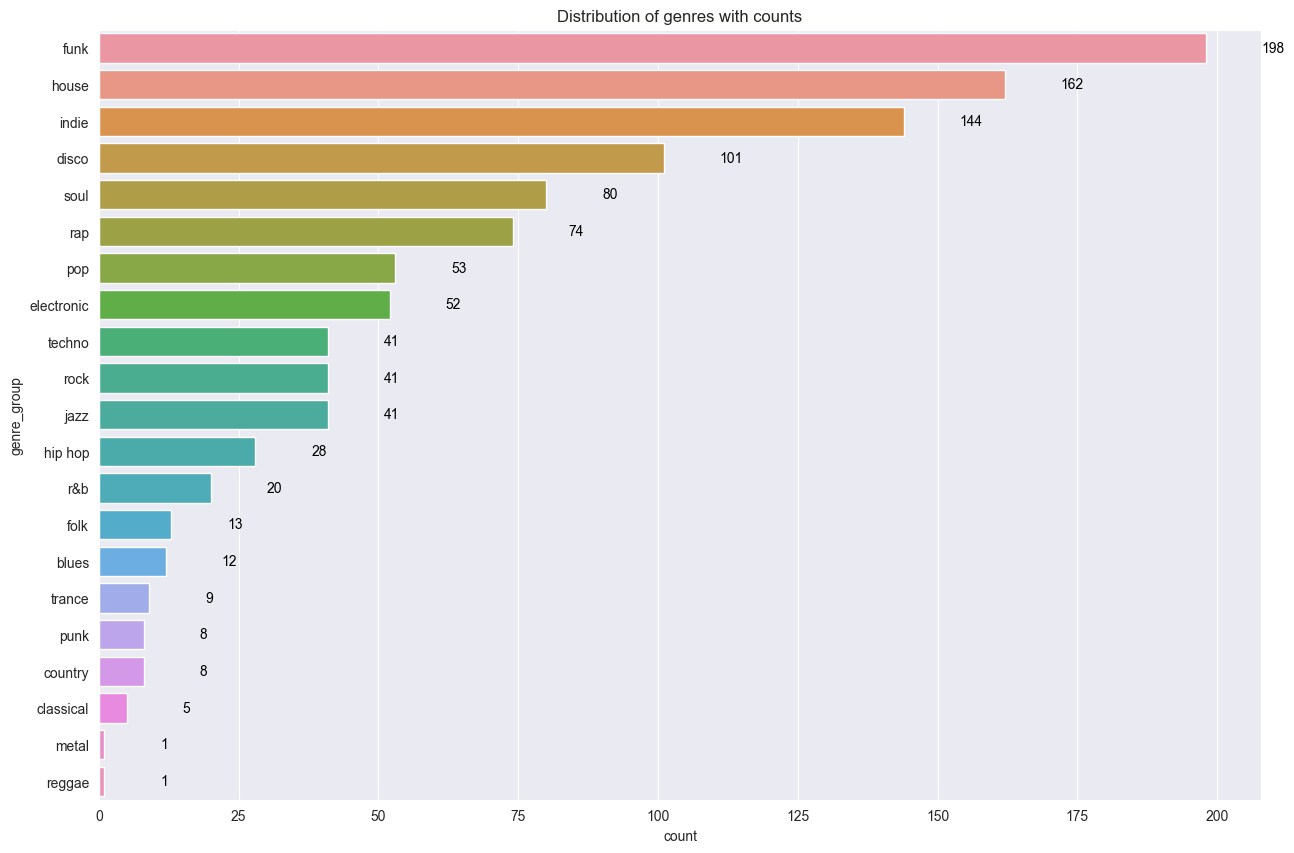

In [16]:
# visualize the distribution of the genres
plt.figure(figsize=(15, 10))
sns.countplot(y='genre_group', data=data, order=data['genre_group'].value_counts().index)

for i, genre in enumerate(data['genre_group'].value_counts().index):
    count = data['genre_group'].value_counts()[genre]
    plt.text(count + 10, i, f'{count}', ha='left', va='center', color='black')

plt.title('Distribution of genres with counts')
plt.show()

#### Save the dataframe to a csv file

This will be the final dataframe that we will use for the analysis. We will use this dataframe for the analysis in the next notebook.

In [17]:
data.to_csv('tracklist.csv', index=False, encoding='utf-8')